# Tarea - "Correlación no implica causalidad"

*Nombre: Pablo Escalante*<br>
*Fecha: 10-01-2022*

### Desarrollo
#### Creación de DataFrame

In [1]:
# Se cargan las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uno de los datasets que utilizaremos será el precio de la acción de LATAM por mes. Ref: https://finance.yahoo.com/quote/LTM.SN/history?p=LTM.SN

In [2]:
# Se carga el dataset.
latam = pd.read_csv('LATAM.csv')
latam.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-01,970.299866,1059.409058,891.091736,920.794739,879.014587,1994223
1,2000-03-01,940.596802,990.101929,811.883545,920.794739,879.014587,868375
2,2000-04-01,910.893738,920.794739,811.883545,905.943237,864.836853,688397
3,2000-05-01,905.943237,905.943237,826.735107,841.586609,803.400391,229049
4,2000-06-01,841.586609,841.586609,757.427979,762.378479,727.786377,122163


In [3]:
# Trabajaremos solo con las columnas Date y Open.
latam = latam[['Date', 'Open']]
latam.head()

,Date,Open
0,2000-02-01,970.299866
1,2000-03-01,940.596802
2,2000-04-01,910.893738
3,2000-05-01,905.943237
4,2000-06-01,841.586609


In [4]:
# Tamaño del dataFrame
latam.shape

(264, 2)

In [5]:
# Revisemos si hay datos nulos en el DataFrame antes de trabajar con ellos.
latam.isnull().sum()

Date    0
Open    0
dtype: int64

In [6]:
# Revisemos qué tipo de datos son las columnas
latam.dtypes

Date     object
Open    float64
dtype: object

In [7]:
# Transformemos el formato de los datos de la columna Date a formato tiempo.
latam['Date'] = pd.to_datetime(latam['Date'])
latam.dtypes

Date    datetime64[ns]
Open           float64
dtype: object

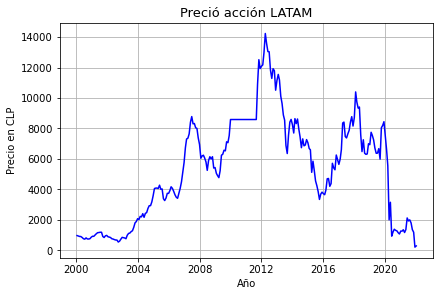

In [8]:
# Gráfico para revisar los datos
fig, ax = plt.subplots(constrained_layout = True)

# Gráficos
sns.lineplot(ax = ax, data = latam, x = 'Date', y = 'Open', color = 'b')

# Títulos
ax.set_title('Preció acción LATAM', fontsize = 13)

# x e y labels
ax.set_xlabel('Año')
ax.set_ylabel('Precio en CLP')

ax.grid()
plt.show()

Trabajaremos con un rango específico de fechas:

In [9]:
# Filtraremos el DataFrame para el año 2016 y 2017.
latam_filter = latam[(latam['Date'] >= '2016-01-01') & (latam['Date'] < '2018-01-01')]
latam_filter = latam_filter.reset_index(drop = True) # Reseteamos el índice.

In [10]:
latam.shape

(264, 2)

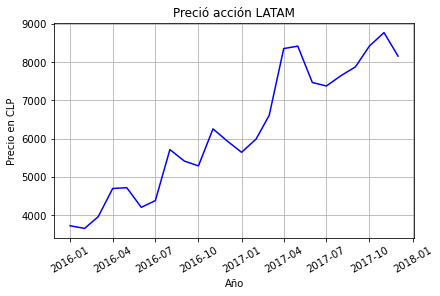

In [11]:
# Gráfico para revisar los datos
fig, ax = plt.subplots(constrained_layout = True)

# Gráficos
sns.lineplot(ax = ax, data = latam_filter, x = 'Date', y = 'Open', color = 'b')

# Títulos
ax.set_title('Preció acción LATAM')

# x e y labels
ax.set_xlabel('Año')
ax.set_ylabel('Precio en CLP')

# ticks
plt.xticks(rotation = 30)

ax.grid()
plt.show()

Nos falta crear la segunda variable. Para ello generaremos un arreglo con números aleatorios y luego los ordenaremos. Esta segunda variable simulará ser la demanda mensual de frutos secos en toneladas de la ciudad de Temuco de Chile.

In [12]:
# Creación del arreglo de datos.
frutos_secos = np.random.randint(100, 1000, 24)
frutos_secos.sort()
frutos_secos

array([113, 190, 235, 239, 285, 293, 301, 312, 400, 420, 469, 486, 501,
       511, 567, 594, 612, 640, 665, 843, 849, 849, 881, 881])

Observemos estos datos en un gráfico.

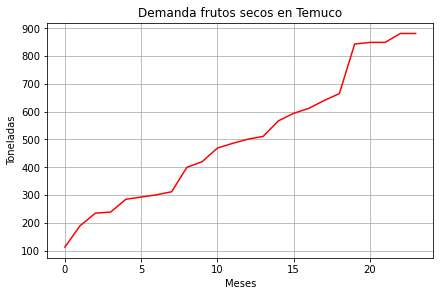

In [13]:
# Gráfico para revisar los datos
fig, ax = plt.subplots(constrained_layout = True)

# Gráficos
sns.lineplot(ax = ax, data = frutos_secos, color = 'r')

# Títulos
ax.set_title('Demanda frutos secos en Temuco')

# x e y labels
ax.set_xlabel('Meses')
ax.set_ylabel('Toneladas')

ax.grid()
plt.show()

In [14]:
# Creamos el DataFrame con el que trabajaremos y añadimos la columna de frutos_secos_ton
df = latam_filter.copy()
df['frutos_secos_ton'] = frutos_secos.tolist()
df.head()

,Date,Open,frutos_secos_ton
0,2016-01-01,3721.800049,113
1,2016-02-01,3652.399902,190
2,2016-03-01,3959.399902,235
3,2016-04-01,4697.299805,239
4,2016-05-01,4717.000000,285


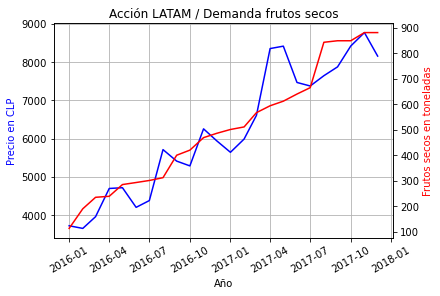

In [15]:
# Gráfico para revisar los datos
fig, ax1 = plt.subplots(constrained_layout = True)

# Instrucción que nos permite trabajar con 2 ejes y.
ax2 = ax1.twinx()

# Gráficos
sns.lineplot(ax = ax1, data = df, x = 'Date', y = 'Open', color = 'b')
sns.lineplot(ax = ax2, data = df, x = 'Date', y = 'frutos_secos_ton', color = 'r')

# Títulos
ax1.set_title('Acción LATAM / Demanda frutos secos')

# x e y labels
ax1.set_xlabel('Año')
ax1.set_ylabel('Precio en CLP', color = 'b')
ax2.set_ylabel('Frutos secos en toneladas', color = 'r')

# ticks
ax1.tick_params(axis='x', rotation=30)

ax1.grid()
plt.show()

#### Análisis de correlación

Del gráfico anterior podemos inferir que existe una correlación lineal positiva entre el precio de la acción de LATAM y la demanda de frutos secos en la ciudad de Temuco, para los años 2016 y 2017. Para corroborar esto, podemos obtener el coeficiente de correlación, el cual está determinado por:

$$\large \rho=\frac{S_{xy}}{S_xS_y}$$ Donde:<br>
$\large S_{xy}$: es la covarianza entre $\large x$ e $\large y$.<br>
$\large S_x$: es la desviación estándar de la variable $\large x$.<br>
$\large S_y$: es la desviación estándar de la variable $\large y$.

Python ofrece un método para calcular el coeficiente de correlación  de un DataFrame:

In [16]:
# Coeficiente de correlación del DataFrame.
r = df.corr()
r

,Open,frutos_secos_ton
Open,1.000000,0.932322
frutos_secos_ton,0.932322,1.000000


In [17]:
print('El coeficiente de correlación entre la variable Open y frutos_secos_ton es:',r.iloc[0,1])

El coeficiente de correlación entre la variable Open y frutos_secos_ton es: 0.9323220215628335


### Conclusiones

- De acuerdo al valor obtenido del coeficiente de correlación y haciendo uso de la tabla de interpretación vista en clases, podemos decir que la correlación entre el precio de la acción de LATAM y la demanda de frutos secos para el periodo 2016 - 2017 es positiva y de tipo fuerte.

<img src= https://static.platzi.com/media/user_upload/tablita-5e6d38e8-8b72-4f20-9c17-8bfa7e11259b.jpg alt="drawing" width="250"/>


- Si bien existe una fuerte correlación entre ambas variables, esto no implica causalidad. Es decir el alza en el valor de la acción de LATAM no generará una aumento en la demana de frutos secos en la ciudad de Temuco o viciversa. Más bien la explicación viene dada por el azar o coincidencia; muchos fenómenos pueden presentar correlación en algún momento determinado. Esto desde luego, no implicará causalidad.